<a href="https://colab.research.google.com/github/alexacondori/alexandracondori/blob/main/ESPACIAL_IRA_PERU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
import geopandas as gpd
import numpy as np
import libpysal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
!pip install libpysal
from libpysal.weights import W,Queen, Rook, KNN, DistanceBand, min_threshold_distance, block_weights, lag_spatial

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 73.4 MB/s eta 0:00:00


In [3]:
!pip install splot # Instalar el paquete "splot"
from splot.libpysal import plot_spatial_weights # Luego, importar la función plot_spatial_weights

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 19.3 MB/s eta 0:00:00


In [4]:
!pip install esda
import esda

In [ ]:
from libpysal.weights import Queen
from libpysal import weights
from libpysal.weights import Rook
from libpysal.weights.util import nonplanar_neighbors
from splot.libpysal import plot_spatial_weights
from splot.esda import lisa_cluster
from splot.esda import moran_scatterplot

In [6]:
drive.mount('/content/drive')
org="/content/drive/MyDrive/ESPACIAL/base"
mapas=gpd.read_file(org+'/PERU.shp')
mapas.head()

Mounted at /content/drive


,fid,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,departam_1,ano,ira_no_neu,neumonias_,neumonia_1,hospitaliz,hospital_1,defuncione,defuncio_1,geometry
0,1.0,01,AMAZONAS,CHACHAPOYAS,INEI,AMAZONAS,2022.0,50417.0,377.0,183.0,66.0,110.0,5.0,22.0,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,2.0,01,AMAZONAS,CHACHAPOYAS,INEI,AMAZONAS,2021.0,29310.0,251.0,221.0,17.0,182.0,5.0,92.0,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
2,24.0,02,ANCASH,HUARAZ,INEI,ANCASH,2022.0,85790.0,599.0,803.0,192.0,493.0,3.0,15.0,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
3,25.0,02,ANCASH,HUARAZ,INEI,ANCASH,2021.0,35977.0,233.0,1093.0,76.0,730.0,1.0,59.0,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
4,47.0,03,APURIMAC,ABANCAY,INEI,APURIMAC,2022.0,46416.0,265.0,289.0,153.0,162.0,4.0,26.0,"POLYGON ((-73.74632 -13.17456, -73.7457 -13.17..."


In [7]:
mapas['ano'] = mapas['ano'].round(0).astype(int)
mapas['neumonias_'] = mapas['neumonias_'].round(0).astype(int)
mapas['neumonia_1'] = mapas['neumonia_1'].round(0).astype(int)
mapas['defuncione'] = mapas['defuncione'].round(0).astype(int)
mapas['defuncio_1'] = mapas['defuncio_1'].round(0).astype(int)

In [8]:
mapa21 =mapas[mapas['ano'] == 2021]
mapa22 =mapas[mapas['ano'] == 2022]

# Matriz Pesos espaciales

# crear nuestras propios pesos espaciales por contacto

In [9]:
# tipo reyna
n=np.arange(len(mapa21))
mapa21['n']=n

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<ipython-input-10-2bf25fe37aae>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  reina = Queen.from_dataframe(mapa21,idVariable = 'n') #reina
/usr/local/lib/python3.10/dist-packages/splot/_viz_libpysal_mpl.py:121: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/usr/local/lib/python3.10/dist-packages/splot/_viz_libpysal_mpl.py:164: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


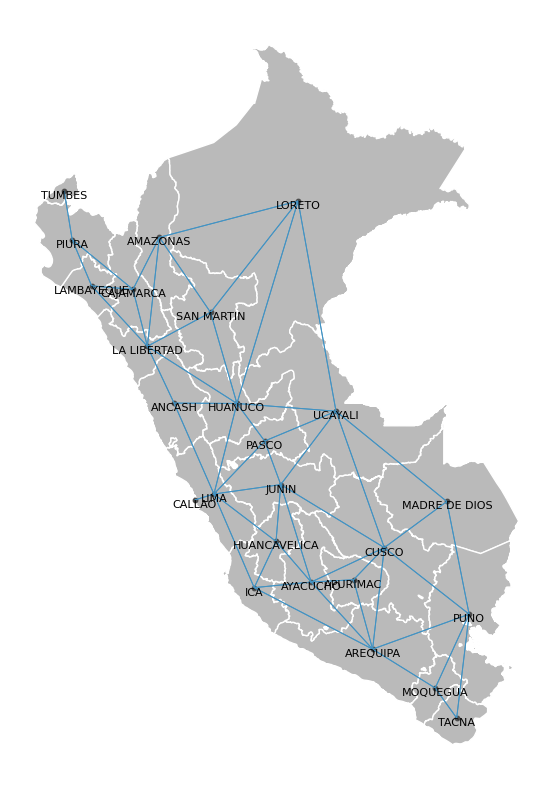

In [10]:
reina = Queen.from_dataframe(mapa21,idVariable = 'n') #reina
wnp = libpysal.weights.util.nonplanar_neighbors(reina, mapa21)
plot_spatial_weights(reina, mapa21)
for idx, row in mapa21.iterrows():
    plt.text(
        row.geometry.centroid.x,  # Coordenada X del centroide
        row.geometry.centroid.y,  # Coordenada Y del centroide
        row['DEPARTAMEN'],       # Nombre del departamento
        fontsize=8,               # Tamaño de fuente
        ha='center',               # Alineación a la derecha
        va='top',              # Alinear horizontalmente
        color='black'              # Color del texto
    )

plt.show()

In [11]:
vecinos=reina.neighbors
mediavecinos=reina.mean_neighbors
maxvecinos=reina.max_neighbors
cardinal=reina.cardinalities
pesos=reina.weights
card_reina = pd.Series(reina.cardinalities)
tfb=pd.crosstab(index=card_reina, columns = 'Frecuencia')

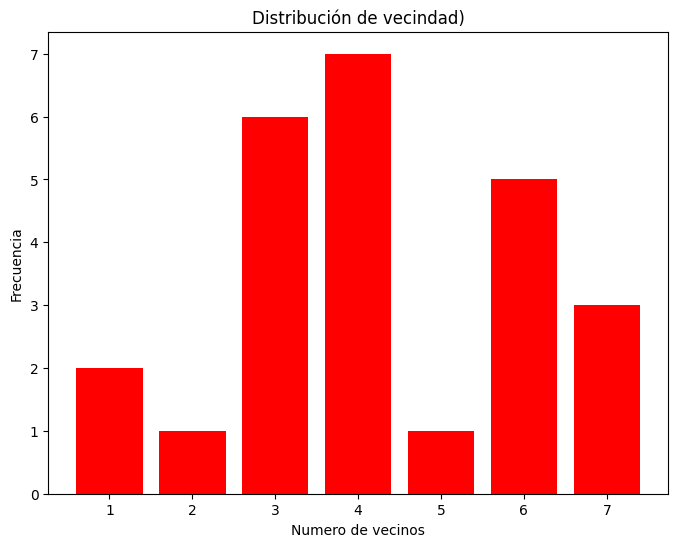

In [12]:
plt.figure(figsize=(8, 6))
plt.bar(tfb.index,tfb.Frecuencia,color='red')
plt.xlabel('Numero de vecinos')
plt.ylabel('Frecuencia')
plt.title('Distribución de vecindad)')
plt.grid(False)
plt.show()

In [13]:
def mploc(mapa,peso,idp,idcampo):
  mp=peso
  indx=idp
  fig , filas = plt.subplots(1, figsize = (10, 10))
  mapa.plot(ax = filas , facecolor = 'white', linewidth = 0.5,edgecolor='black') # Graficar la Capa Base
  centrogeo=mapa.set_index(idcampo).loc[[int(indx)] , ['geometry']] # Seleccionar el Polígono Focal
  centrogeo.plot(ax = filas , facecolor = 'lightpink', alpha = 1, linewidth = 0,edgecolor='black') # Graficar el Polígono Focal
  vecinos = mapa21.set_index(idcampo).loc[list(mp[int(indx)].keys()), :]
  vecinos.plot(ax = filas , facecolor = 'lightsalmon',edgecolor='black') # Graficar

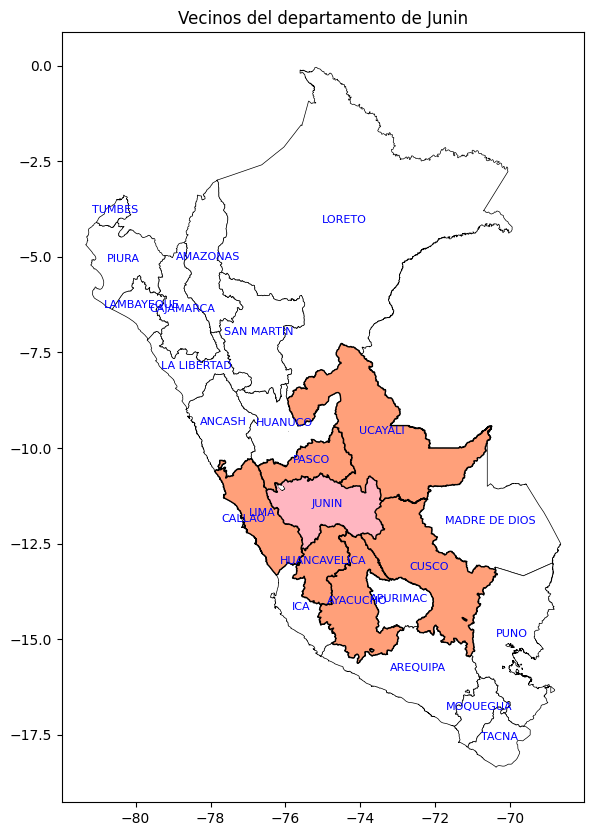

In [14]:
mploc(mapa21,reina,11,'n')
for idx, row in mapa21.iterrows():
    plt.text(
        row.geometry.centroid.x,  # Coordenada X del centroide
        row.geometry.centroid.y,  # Coordenada Y del centroide
        row['DEPARTAMEN'],
        fontsize=8,
        ha='center',
        color='blue'
    )
plt.title("Vecinos del departamento de Junin")
plt.show()

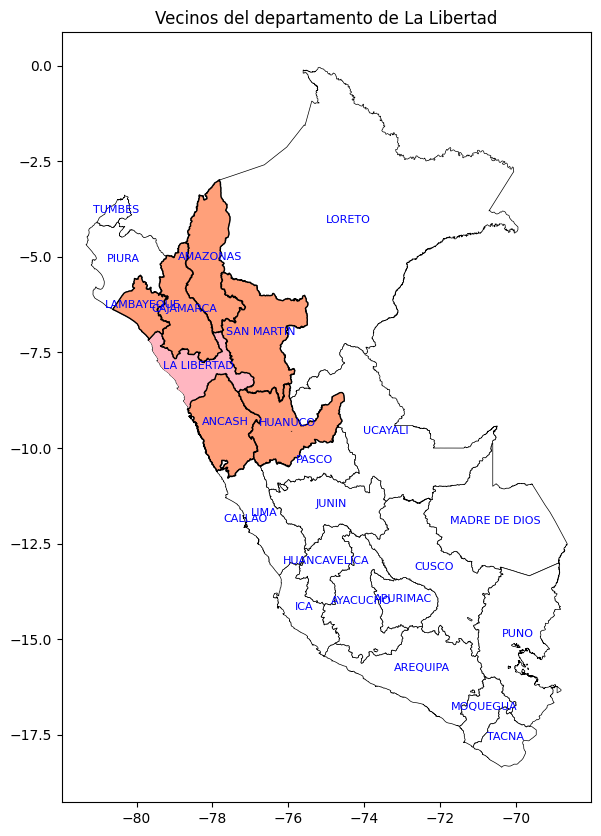

In [15]:
mploc(mapa21,reina,12,'n')
for idx, row in mapa21.iterrows():
    plt.text(
        row.geometry.centroid.x,  # Coordenada X del centroide
        row.geometry.centroid.y,  # Coordenada Y del centroide
        row['DEPARTAMEN'],       # Nombre del departamento
        fontsize=8,               # Tamaño de fuente
        ha='center',              # Alinear horizontalmente
        color='blue'              # Color del texto
    )
plt.title("Vecinos del departamento de La Libertad")
plt.show()

# AÑO 2021

# Autocorrelación (Indice de moran Global)

In [16]:
moran21_neumo5= esda.Moran(mapa21['neumonias_'], reina)
moran21_neumo60= esda.Moran(mapa21['neumonia_1'], reina)
moran21_def5= esda.Moran(mapa21['defuncione'], reina)
moran21_def60= esda.Moran(mapa21['defuncio_1'], reina)

In [17]:
moran21_neumo5.I,moran21_neumo60.I,moran21_def5.I,moran21_def60.I

(-0.1837996430047404,
 -0.12380260011581996,
 0.1005564897109456,
 -0.15090671984172233)

In [27]:
moran21_neumo5.p_sim,moran21_neumo60.p_sim,moran21_def5.p_sim,moran21_def60.p_sim

(0.006, 0.139, 0.146, 0.106)

In [167]:
moran22_neumo5= esda.Moran(mapa22['neumonias_'], reina)
moran22_neumo60= esda.Moran(mapa22['neumonia_1'], reina)
moran22_def5= esda.Moran(mapa22['defuncione'], reina)
moran22_def60= esda.Moran(mapa22['defuncio_1'], reina)

In [168]:
moran22_neumo5.I,moran22_neumo60.I,moran22_def5.I,moran22_def60.I

(-0.245483528317766,
 -0.13446386765841772,
 0.02871774809630598,
 0.013816774940055043)

In [169]:
moran22_neumo5.p_sim,moran22_neumo60.p_sim,moran22_def5.p_sim,moran22_def60.p_sim

(0.004, 0.06, 0.248, 0.26)

Gráfico de Moran **NEUMONIA MENORES DE 5 AÑOS**

In [28]:
rez_espacial = lag_spatial(reina, mapa21['neumonias_'])
mapa21['rez_espacial_ne<5'] = rez_espacial
mapa21[['neumonias_','rez_espacial_ne<5']].head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,neumonias_,rez_espacial_ne<5
1,251,427.500000
3,233,1217.666667
5,69,274.333333
7,301,154.833333
9,160,177.500000


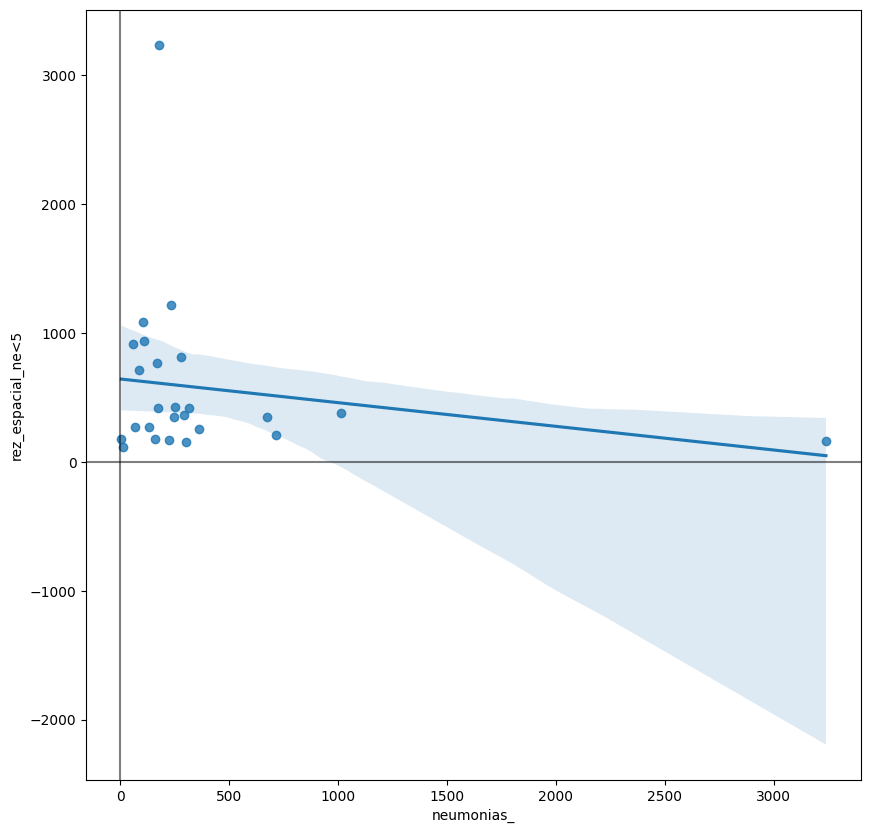

In [29]:
# Preparación de la Gráfica
fig, filas = plt.subplots(1, figsize = (10,10))
# Generación del Diagrama de Dispersión
sns.regplot(x = 'neumonias_' , y = 'rez_espacial_ne<5', data = mapa21)
# Adición de lineas horizontal y vertical
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.show()

In [150]:
def grafmoran(mapa,campo,mpesos):
  # Estandarizar el Número de Robos por
  neumonia_std = (mapa[campo]-mapa[campo].mean())/mapa[campo].std()
  # Calcular el Rezago Espacial de la variable estandarizada y asignarle los índices originales
  rez_espacial_std = pd.Series(lag_spatial(mpesos,neumonia_std),index=neumonia_std.index)
  # Preparación de la Figura y sus Filas
  fig , filas = plt.subplots(1 , figsize = (10,10))
  # Graficar los Valores
  sns.regplot(x = neumonia_std , y = rez_espacial_std)
  # Añadir líneas horizontal y vertical
  plt.axvline(0, c = 'grey', alpha = 0.5)
  plt.axhline(0, c = 'grey', alpha = 0.5)
  # Adición de nombre de los cuadrantes
  plt.text(1, 0.5, "A-A", fontsize=25)
  plt.text(1, -0.5, "A-B", fontsize=25)
  plt.text(-0.5, 0.5, "B-A", fontsize=25)
  plt.text(-0.5, -0.5, "B-B", fontsize=25)

  # Mostrar la Gráfica
  plt.show()

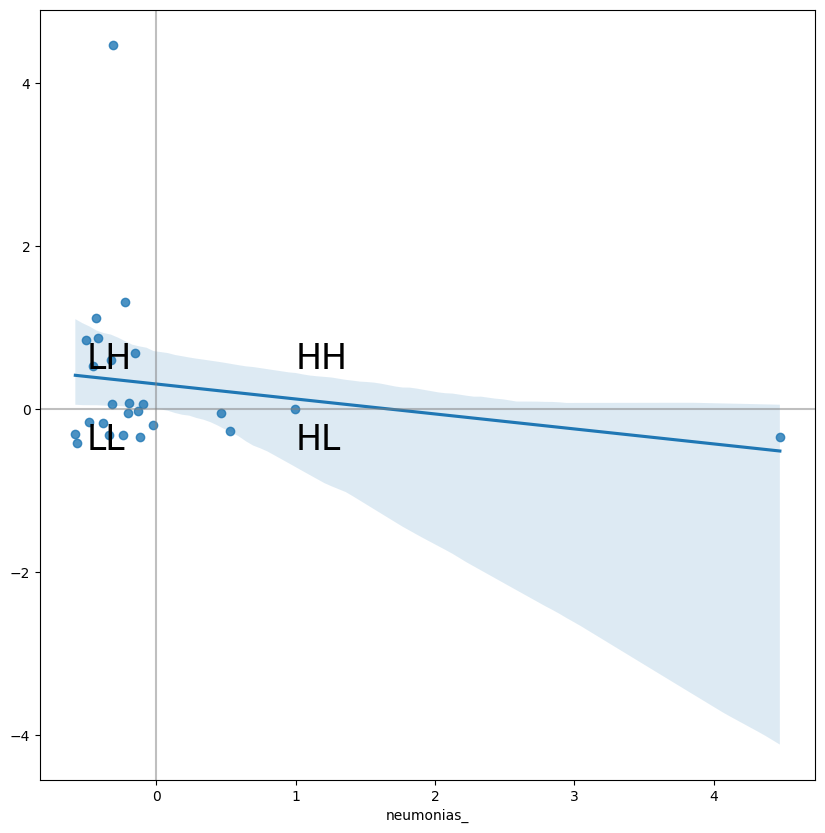

In [31]:
grafmoran(mapa21,'neumonias_',reina)

Gráfico de Moran **DEFUNCION MENORES DE 5 AÑOS**

In [32]:
rez_espacial = lag_spatial(reina, mapa21['defuncione'])
mapa21['rez_espacial_de<5'] = rez_espacial
mapa21[['defuncione','rez_espacial_de<5']].head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,defuncione,rez_espacial_de<5
1,5,6.500000
3,1,7.000000
5,0,5.333333
7,3,3.500000
9,7,3.000000


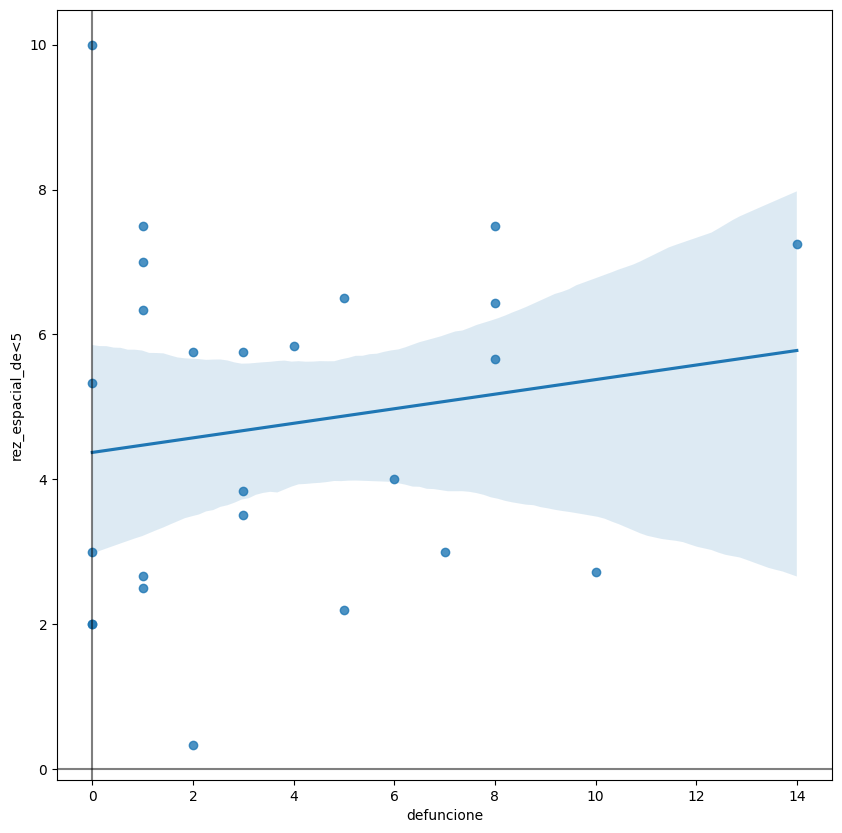

In [33]:
# Preparación de la Gráfica
fig, filas = plt.subplots(1, figsize = (10,10))

# Generación del Diagrama de Dispersión
sns.regplot(x = 'defuncione' , y = 'rez_espacial_de<5', data = mapa21)# Adición de lineas horizontal y vertical
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)

# Muestra del resultado
plt.show()

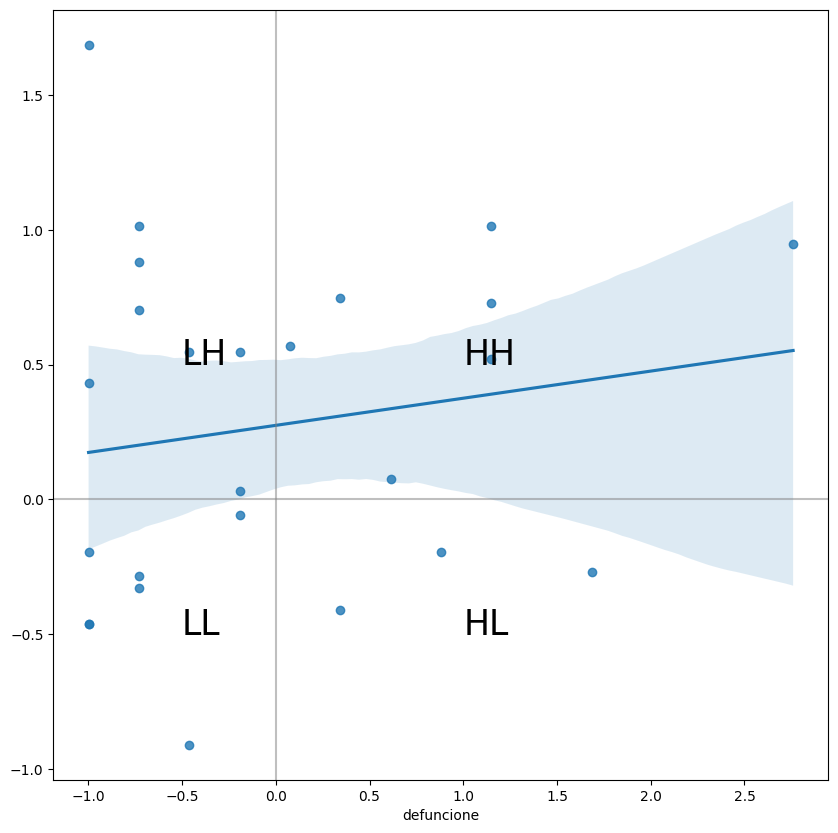

In [34]:
grafmoran(mapa21,'defuncione',reina)

Gráfico de Moran **NEUMONIA MAYORES DE 60 AÑOS**

In [ ]:
rez_espacial = lag_spatial(reina, mapa21['neumonia_1'])
mapa21['rez_espacial_ne<60'] = rez_espacial
mapa21[['neumonia_1','rez_espacial_ne<60']].head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,neumonia_1,rez_espacial_ne<60
1,221,766.250000
3,1093,4033.666667
5,382,2144.000000
7,2869,1026.500000
9,1972,1268.166667


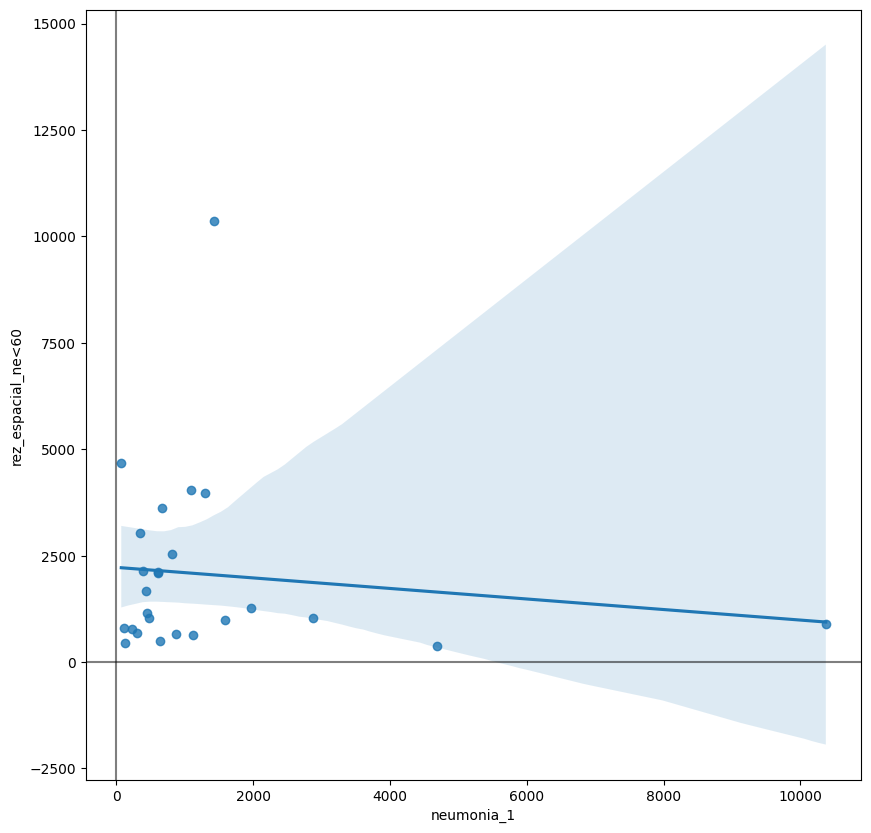

In [ ]:
# Preparación de la Gráfica
fig, filas = plt.subplots(1, figsize = (10,10))

# Generación del Diagrama de Dispersión
sns.regplot(x = 'neumonia_1' , y = 'rez_espacial_ne<60', data = mapa21)# Adición de lineas horizontal y vertical
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)

# Muestra del resultado
plt.show()

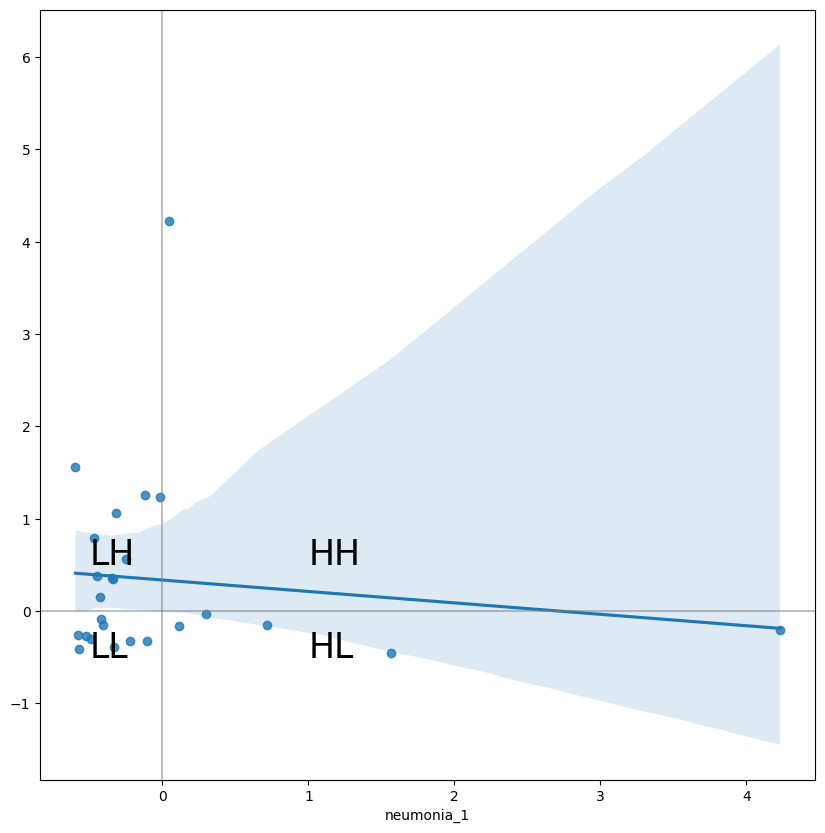

In [ ]:
grafmoran(mapa21,'neumonia_1',reina)

Gráfico de Moran **DEFUNCION MAYORES DE 60 AÑOS**

In [ ]:
rez_espacial = lag_spatial(reina, mapa21['defuncio_1'])
mapa21['rez_espacial_de<60'] = rez_espacial
mapa21[['defuncio_1','rez_espacial_de<60']].head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,defuncio_1,rez_espacial_de<60
1,92,175.750000
3,59,717.666667
5,7,220.333333
7,114,173.000000
9,455,127.333333


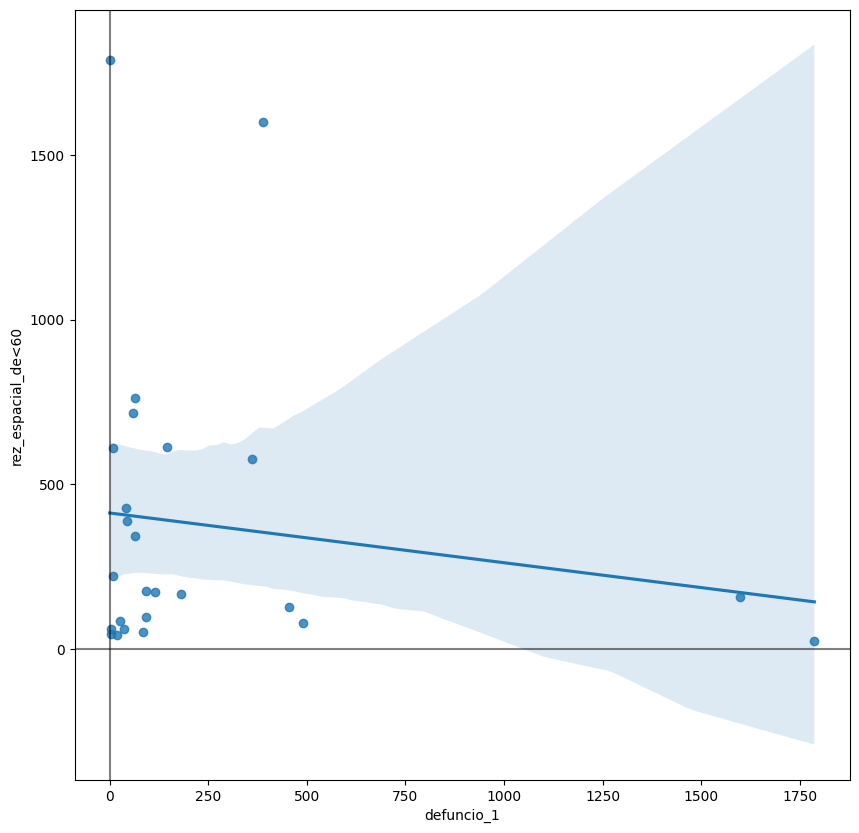

In [ ]:
# Preparación de la Gráfica
fig, filas = plt.subplots(1, figsize = (10,10))

# Generación del Diagrama de Dispersión
sns.regplot(x = 'defuncio_1' , y = 'rez_espacial_de<60', data = mapa21)# Adición de lineas horizontal y vertical
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)

# Muestra del resultado
plt.show()

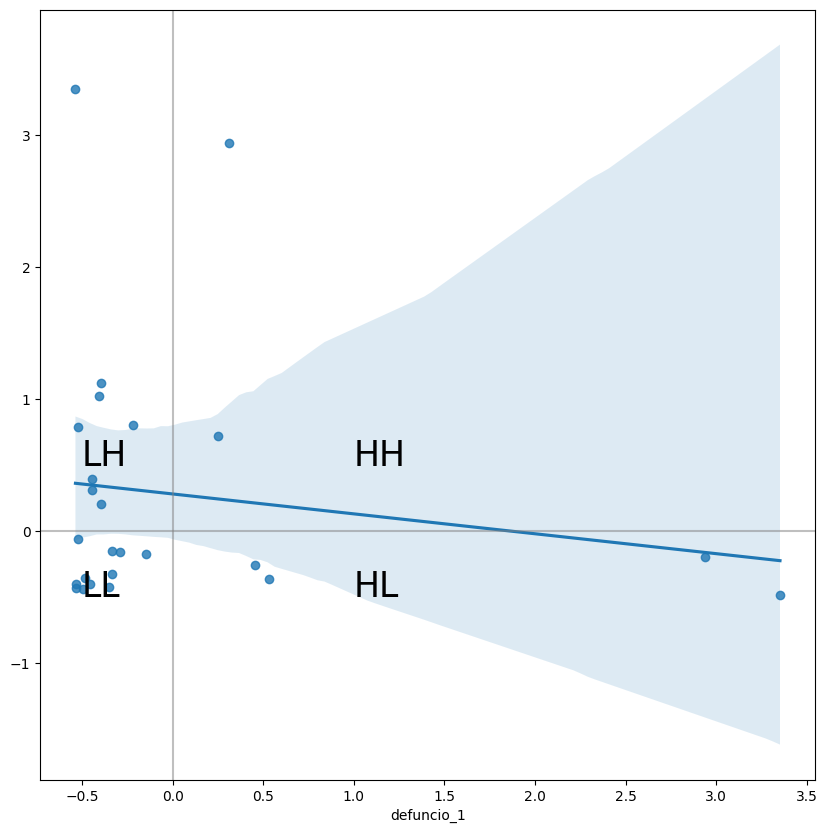

In [ ]:
grafmoran(mapa21,'defuncio_1',reina)

# Autocorrelación Espacial Local

In [35]:
lisa_ne5 = esda.Moran_Local(mapa21['neumonias_'] , reina)
lisa_de5 = esda.Moran_Local(mapa21['defuncione'] , reina)
lisa_ne60 = esda.Moran_Local(mapa21['neumonia_1'] , reina)
lisa_de60 = esda.Moran_Local(mapa21['defuncio_1'] , reina)

In [64]:
lisa22_ne5 = esda.Moran_Local(mapa22['neumonias_'] , reina)
lisa22_de5 = esda.Moran_Local(mapa22['defuncione'] , reina)
lisa22_ne60 = esda.Moran_Local(mapa22['neumonia_1'] , reina)
lisa22_de60 = esda.Moran_Local(mapa22['defuncio_1'] , reina)

In [40]:
# numero de cuadrante
cuane5=lisa_ne5.q
cuade5=lisa_de5.q
cuane60=lisa_ne60.q
cuade60=lisa_de60.q

In [ ]:
#significancia
signe5=lisa_ne5.p_sim
sigde5=lisa_de5.p_sim
signe60=lisa_ne60.p_sim
sigde60=lisa_de60.p_sim

In [ ]:
# Determinar si una observación es significativa o no
mapa21['significativo_ne5'] = signe5 < 0.05
mapa21['significativo_de5'] = sigde5 < 0.05
mapa21['significativo_ne60'] = signe60 < 0.05
mapa21['significativo_de60'] = sigde60 < 0.05
# Almacenar el cuadrante al cual pertenecen
mapa21['cuadrante_ne5'] = cuane5
mapa21['cuadrante_de5'] = cuade5
mapa21['cuadrante_ne60'] = cuane60
mapa21['cuadrante_de60'] = cuade60

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Tomando como significativos a todos los valores con un p-value menor al 5%, se crea la columna significativo que contiene True si el p-value de la observación satisface esa condición, y False si no es así. Esto puede ser verificado sencillamente:

In [ ]:
#mapa21['cuadrante'].value_counts().reset_index()

In [ ]:
#mapa21['significativo'].value_counts().reset_index()

In [ ]:
#pd.crosstab(mapa21['significativo'], mapa21['cuadrante'])

In [ ]:
#mapa21[['IDDPTO','significativo']].head(24)

In [ ]:
#lisa.p_sim[:5]

La correspondencia entre los números de la variable y el nombre de los cuadrantes es la siguiente:

* 1 - HH
* 2 - LH
* 3 - LL
* 4 - HL

LISA **NEUMONIA MENORES DE 5 AÑOS**

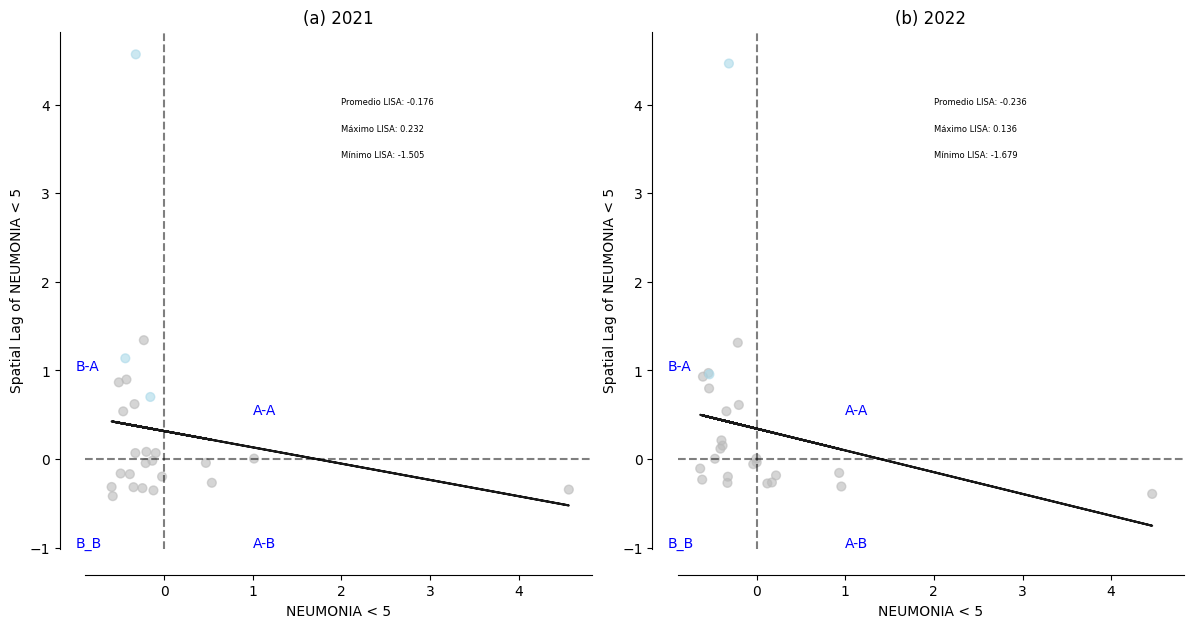

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Gráfico para el primer año
ax1 = axes[0]
moran_scatterplot(lisa_ne5, p=0.05, ax=ax1)  # lisa_ne5 corresponde al primer año
ax1.set_title('(a) 2021')
ax1.set_xlabel('NEUMONIA < 5')
ax1.set_ylabel('Spatial Lag of NEUMONIA < 5')
ax1.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax1.text(1, -1.0, "A-B", fontsize=10,color='blue')
ax1.text(-1, 1, "B-A", fontsize=10,color='blue')
ax1.text(-1, -1, "B_B", fontsize=10,color='blue')

# Estadísticas para el primer año
mean_lisa_2021 = lisa_ne5.Is.mean()
max_lisa_2021 = lisa_ne5.Is.max()
min_lisa_2021 = lisa_ne5.Is.min()
ax1.text(2,4, f"Promedio LISA: {mean_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,3.7, f"Máximo LISA: {max_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,3.4, f"Mínimo LISA: {min_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))

# Gráfico para el segundo año
ax2 = axes[1]
moran_scatterplot(lisa22_ne5, p=0.05, ax=ax2)
ax2.set_title('(b) 2022')
ax2.set_xlabel('NEUMONIA < 5')
ax2.set_ylabel('Spatial Lag of NEUMONIA < 5')
ax2.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax2.text(1, -1.0, "A-B", fontsize=10,color='blue')
ax2.text(-1, 1, "B-A", fontsize=10,color='blue')
ax2.text(-1, -1, "B_B", fontsize=10,color='blue')

# Estadísticas para el segundo año
mean_lisa_2022 = lisa22_ne5.Is.mean()
max_lisa_2022 = lisa22_ne5.Is.max()
min_lisa_2022 = lisa22_ne5.Is.min()
ax2.text(2,4, f"Promedio LISA: {mean_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,3.7, f"Máximo LISA: {max_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,3.4, f"Mínimo LISA: {min_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
# Obtener los límites máximos y mínimos entre ambos gráficos
x_min = min(ax1.get_xlim()[0], ax2.get_xlim()[0])
x_max = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

# Configurar los mismos límites para ambos gráficos
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)
# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


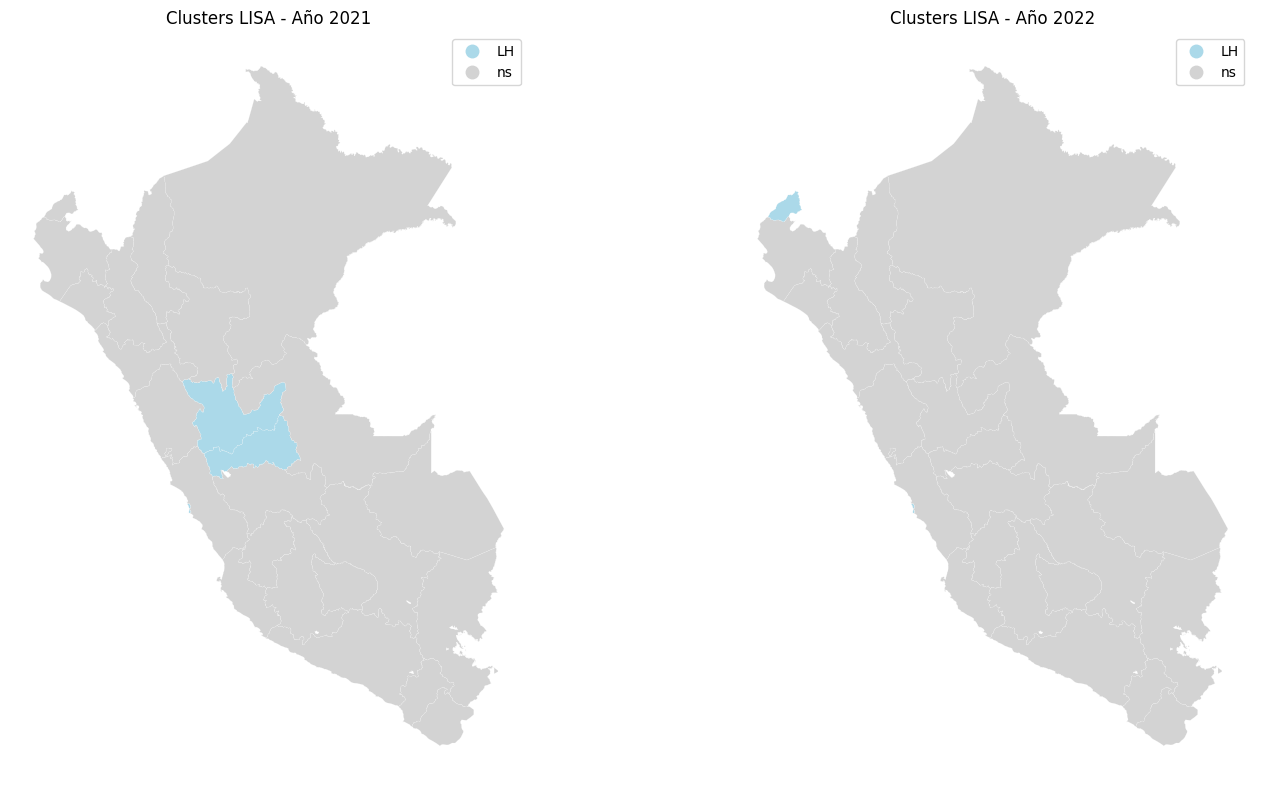

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Crear una figura con dos subgráficos

# Mapa para el primer año
ax1 = axes[0]
lisa_cluster(lisa_ne5, mapa21, p=0.05, ax=ax1)  # lisa_ne5 y mapa21 para el primer año
ax1.set_title("Clusters LISA - Año 2021")

# Mapa para el segundo año
ax2 = axes[1]
lisa_cluster(lisa22_ne5, mapa22, p=0.05, ax=ax2)  # lisa22_ne5 y mapa22 para el segundo año
ax2.set_title("Clusters LISA - Año 2022")

# Ajustar espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


lisa **NEUMONIA MAYORES DE 60 AÑOS**

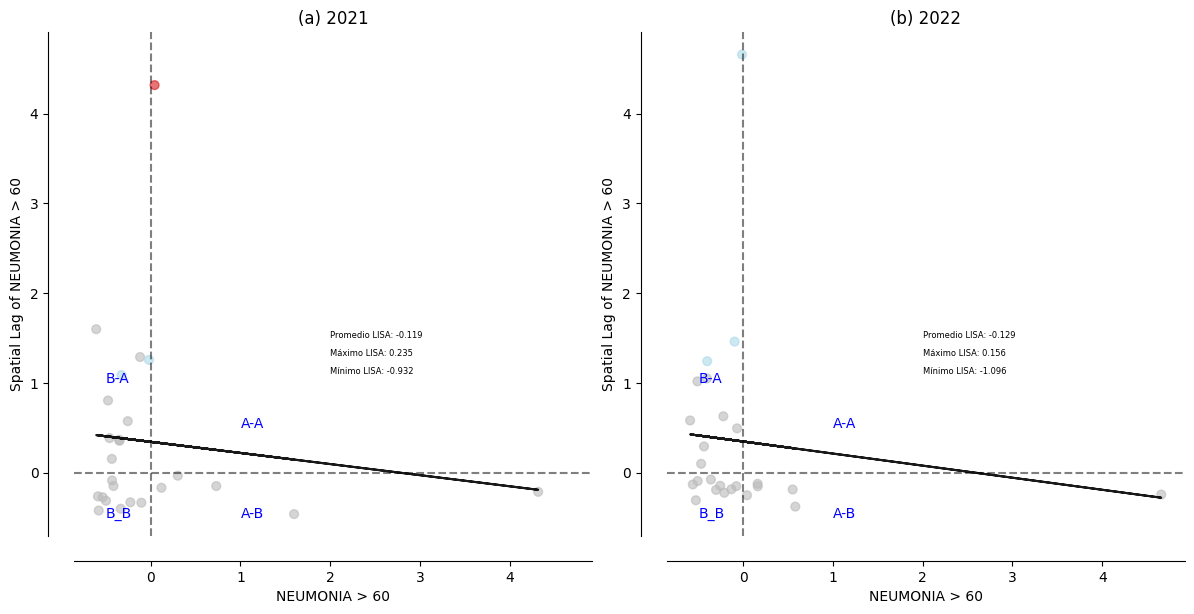

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Gráfico para el primer año
ax1 = axes[0]
moran_scatterplot(lisa_ne60, p=0.05, ax=ax1)  # lisa_ne5 corresponde al primer año
ax1.set_title('(a) 2021')
ax1.set_xlabel('NEUMONIA > 60')
ax1.set_ylabel('Spatial Lag of NEUMONIA > 60')
ax1.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax1.text(1, -0.5, "A-B", fontsize=10,color='blue')
ax1.text(-0.5, 1, "B-A", fontsize=10,color='blue')
ax1.text(-0.5, -0.5, "B_B", fontsize=10,color='blue')

# Estadísticas para el primer año
mean_lisa_2021 = lisa_ne60.Is.mean()
max_lisa_2021 = lisa_ne60.Is.max()
min_lisa_2021 = lisa_ne60.Is.min()
ax1.text(2,1.5, f"Promedio LISA: {mean_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,1.3, f"Máximo LISA: {max_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,1.1, f"Mínimo LISA: {min_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))

# Gráfico para el segundo año
ax2 = axes[1]
moran_scatterplot(lisa22_ne60, p=0.05, ax=ax2)
ax2.set_title('(b) 2022')
ax2.set_xlabel('NEUMONIA > 60')
ax2.set_ylabel('Spatial Lag of NEUMONIA > 60')
ax2.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax2.text(1, -0.5, "A-B", fontsize=10,color='blue')
ax2.text(-0.5, 1, "B-A", fontsize=10,color='blue')
ax2.text(-0.5, -0.5, "B_B", fontsize=10,color='blue')

# Estadísticas para el segundo año
mean_lisa_2022 = lisa22_ne60.Is.mean()
max_lisa_2022 = lisa22_ne60.Is.max()
min_lisa_2022 = lisa22_ne60.Is.min()
ax2.text(2,1.5, f"Promedio LISA: {mean_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,1.3, f"Máximo LISA: {max_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,1.1, f"Mínimo LISA: {min_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))

# Obtener los límites máximos y mínimos entre ambos gráficos
x_min = min(ax1.get_xlim()[0], ax2.get_xlim()[0])
x_max = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

# Configurar los mismos límites para ambos gráficos
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)
# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

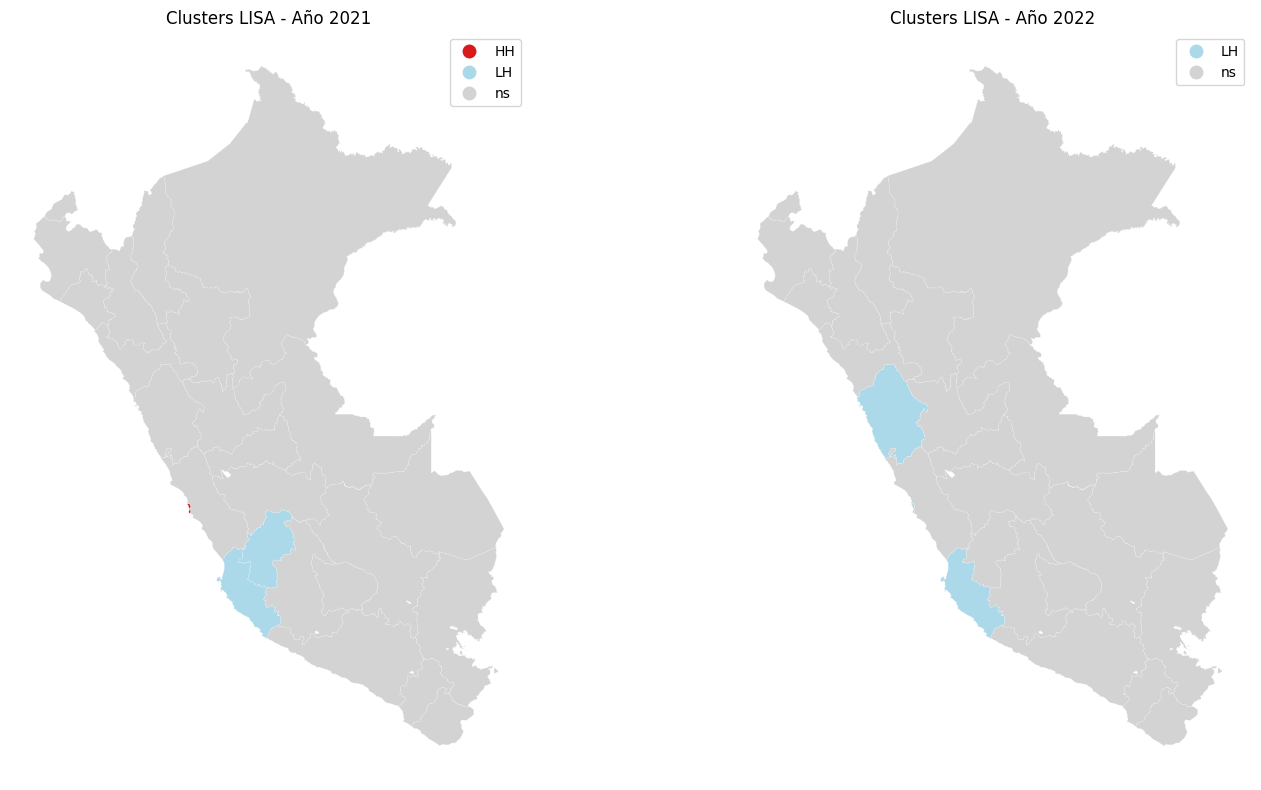

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Crear una figura con dos subgráficos

# Mapa para el primer año
ax1 = axes[0]
lisa_cluster(lisa_ne60, mapa21, p=0.05, ax=ax1)  # lisa_ne5 y mapa21 para el primer año
ax1.set_title("Clusters LISA - Año 2021")

# Mapa para el segundo año
ax2 = axes[1]
lisa_cluster(lisa22_ne60, mapa22, p=0.05, ax=ax2)  # lisa22_ne5 y mapa22 para el segundo año
ax2.set_title("Clusters LISA - Año 2022")

# Ajustar espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

defuncion **menores de cinco años**

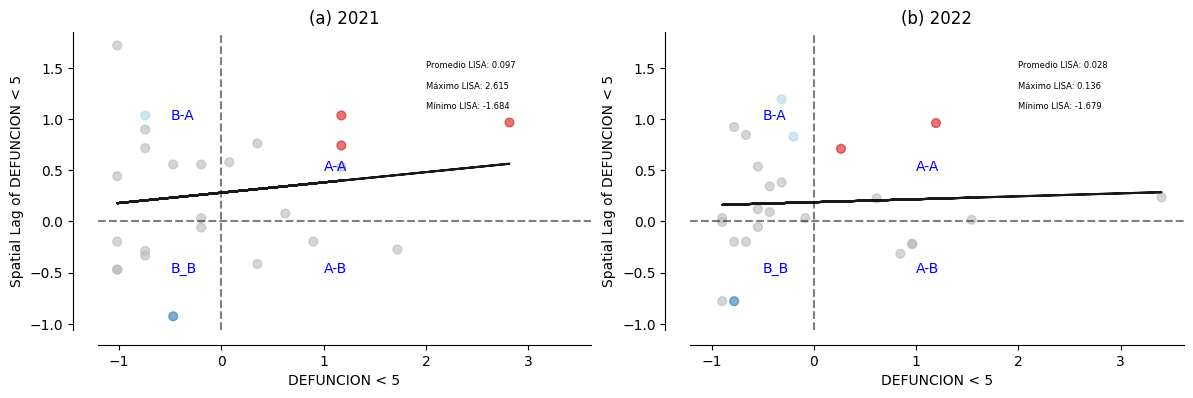

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Gráfico para el primer año
ax1 = axes[0]
moran_scatterplot(lisa_de5, p=0.05, ax=ax1)  # lisa_ne5 corresponde al primer año
ax1.set_title('(a) 2021')
ax1.set_xlabel('DEFUNCION < 5')
ax1.set_ylabel('Spatial Lag of DEFUNCION < 5')
ax1.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax1.text(1, -0.5, "A-B", fontsize=10,color='blue')
ax1.text(-0.5, 1, "B-A", fontsize=10,color='blue')
ax1.text(-0.5, -0.5, "B_B", fontsize=10,color='blue')

# Estadísticas para el primer año
mean_lisa_2021 = lisa_de5.Is.mean()
max_lisa_2021 = lisa_de5.Is.max()
min_lisa_2021 = lisa_de5.Is.min()
ax1.text(2,1.5, f"Promedio LISA: {mean_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,1.3, f"Máximo LISA: {max_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,1.1, f"Mínimo LISA: {min_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))

# Gráfico para el segundo año
ax2 = axes[1]
moran_scatterplot(lisa22_de5, p=0.05, ax=ax2)
ax2.set_title('(b) 2022')
ax2.set_xlabel('DEFUNCION < 5')
ax2.set_ylabel('Spatial Lag of DEFUNCION < 5')
ax2.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax2.text(1, -0.5, "A-B", fontsize=10,color='blue')
ax2.text(-0.5, 1, "B-A", fontsize=10,color='blue')
ax2.text(-0.5, -0.5, "B_B", fontsize=10,color='blue')

# Estadísticas para el segundo año
mean_lisa_2022 = lisa22_de5.Is.mean()
max_lisa_2022 = lisa22_ne5.Is.max()
min_lisa_2022 = lisa22_ne5.Is.min()
ax2.text(2,1.5, f"Promedio LISA: {mean_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,1.3, f"Máximo LISA: {max_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,1.1, f"Mínimo LISA: {min_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))

# Obtener los límites máximos y mínimos entre ambos gráficos
x_min = min(ax1.get_xlim()[0], ax2.get_xlim()[0])
x_max = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

# Configurar los mismos límites para ambos gráficos
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)
# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

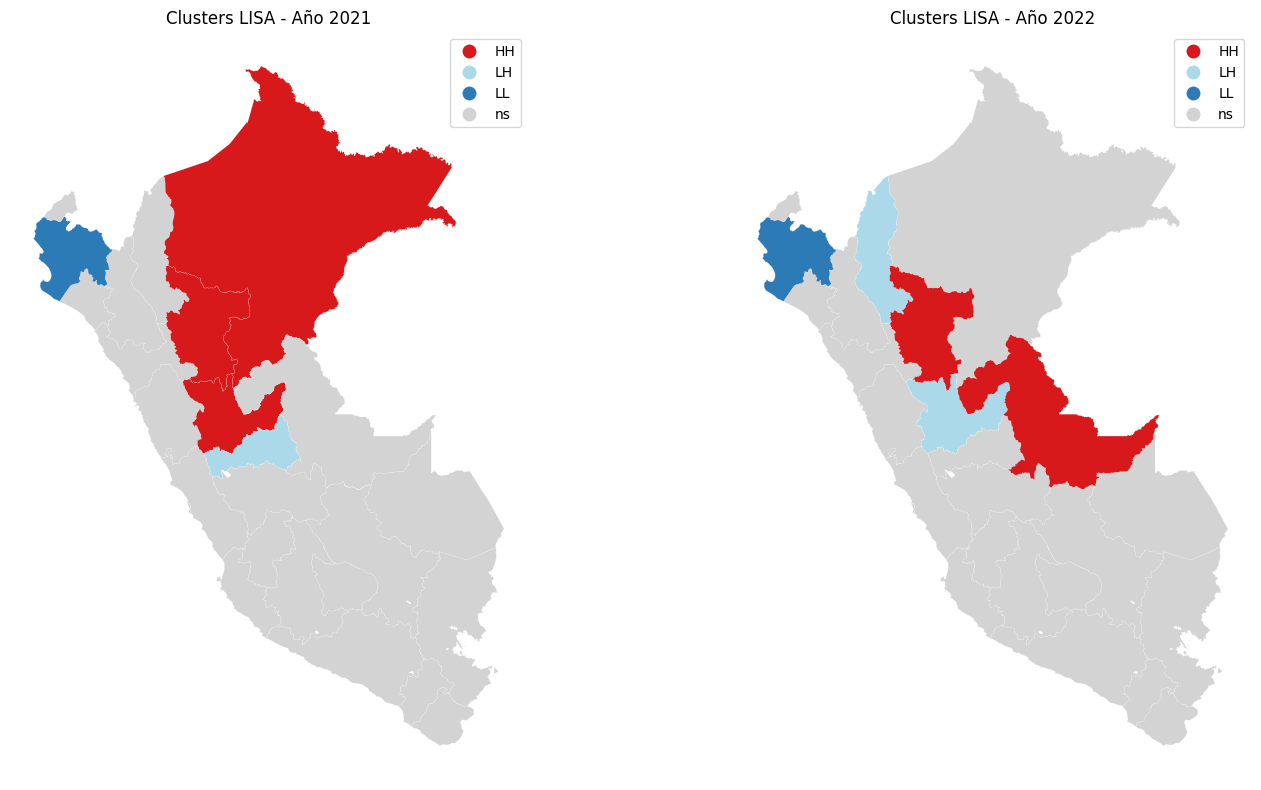

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Crear una figura con dos subgráficos

# Mapa para el primer año
ax1 = axes[0]
lisa_cluster(lisa_de5, mapa21, p=0.05, ax=ax1)  # lisa_ne5 y mapa21 para el primer año
ax1.set_title("Clusters LISA - Año 2021")

# Mapa para el segundo año
ax2 = axes[1]
lisa_cluster(lisa22_de5, mapa22, p=0.05, ax=ax2)  # lisa22_ne5 y mapa22 para el segundo año
ax2.set_title("Clusters LISA - Año 2022")

# Ajustar espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

defuncion **mayores de 60 años**

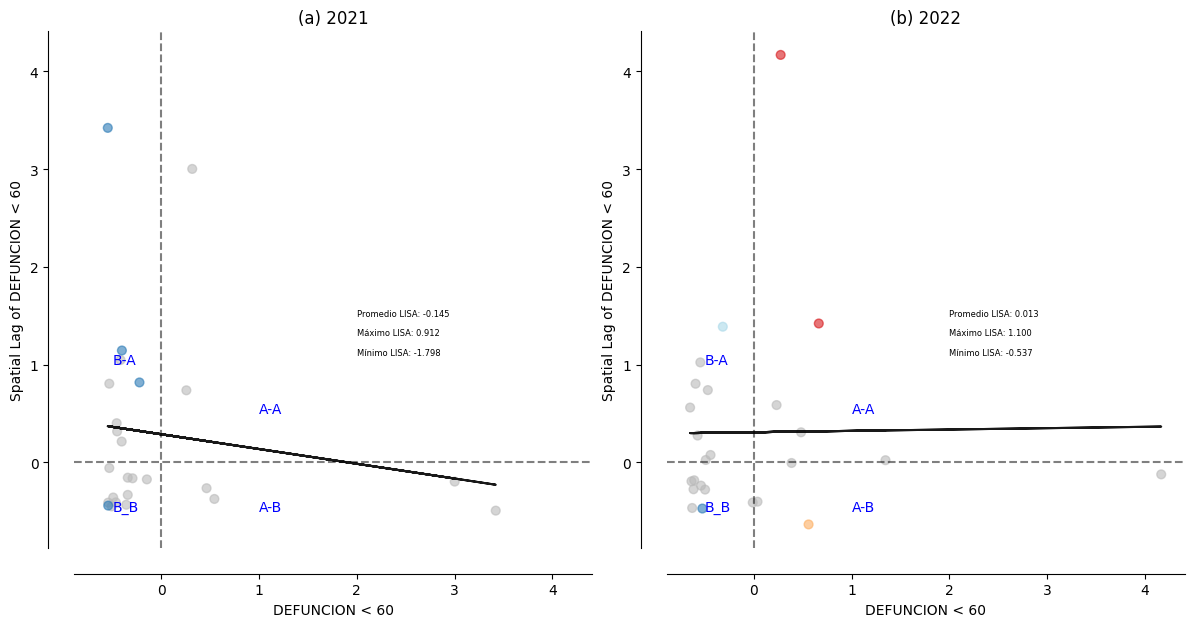

In [165]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Gráfico para el primer año
ax1 = axes[0]
moran_scatterplot(lisa_de60, p=0.05, ax=ax1)  # lisa_ne5 corresponde al primer año
ax1.set_title('(a) 2021')
ax1.set_xlabel('DEFUNCION < 60')
ax1.set_ylabel('Spatial Lag of DEFUNCION < 60')
ax1.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax1.text(1, -0.5, "A-B", fontsize=10,color='blue')
ax1.text(-0.5, 1, "B-A", fontsize=10,color='blue')
ax1.text(-0.5, -0.5, "B_B", fontsize=10,color='blue')

# Estadísticas para el primer año
mean_lisa_2021 = lisa_de60.Is.mean()
max_lisa_2021 = lisa_de60.Is.max()
min_lisa_2021 = lisa_de60.Is.min()
ax1.text(2,1.5, f"Promedio LISA: {mean_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,1.3, f"Máximo LISA: {max_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax1.text(2,1.1, f"Mínimo LISA: {min_lisa_2021:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))

# Gráfico para el segundo año
ax2 = axes[1]
moran_scatterplot(lisa22_de60, p=0.05, ax=ax2)
ax2.set_title('(b) 2022')
ax2.set_xlabel('DEFUNCION < 60')
ax2.set_ylabel('Spatial Lag of DEFUNCION < 60')
ax2.text(1, 0.5, "A-A", fontsize=10,color='blue')
ax2.text(1, -0.5, "A-B", fontsize=10,color='blue')
ax2.text(-0.5, 1, "B-A", fontsize=10,color='blue')
ax2.text(-0.5, -0.5, "B_B", fontsize=10,color='blue')

# Estadísticas para el segundo año
mean_lisa_2022 = lisa22_de60.Is.mean()
max_lisa_2022 = lisa22_de60.Is.max()
min_lisa_2022 = lisa22_de60.Is.min()
ax2.text(2,1.5, f"Promedio LISA: {mean_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,1.3, f"Máximo LISA: {max_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))
ax2.text(2,1.1, f"Mínimo LISA: {min_lisa_2022:.3f}", fontsize=6, color='black', bbox=dict(facecolor='white', edgecolor='white'))

# Obtener los límites máximos y mínimos entre ambos gráficos
x_min = min(ax1.get_xlim()[0], ax2.get_xlim()[0])
x_max = max(ax1.get_xlim()[1], ax2.get_xlim()[1])
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

# Configurar los mismos límites para ambos gráficos
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)
# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

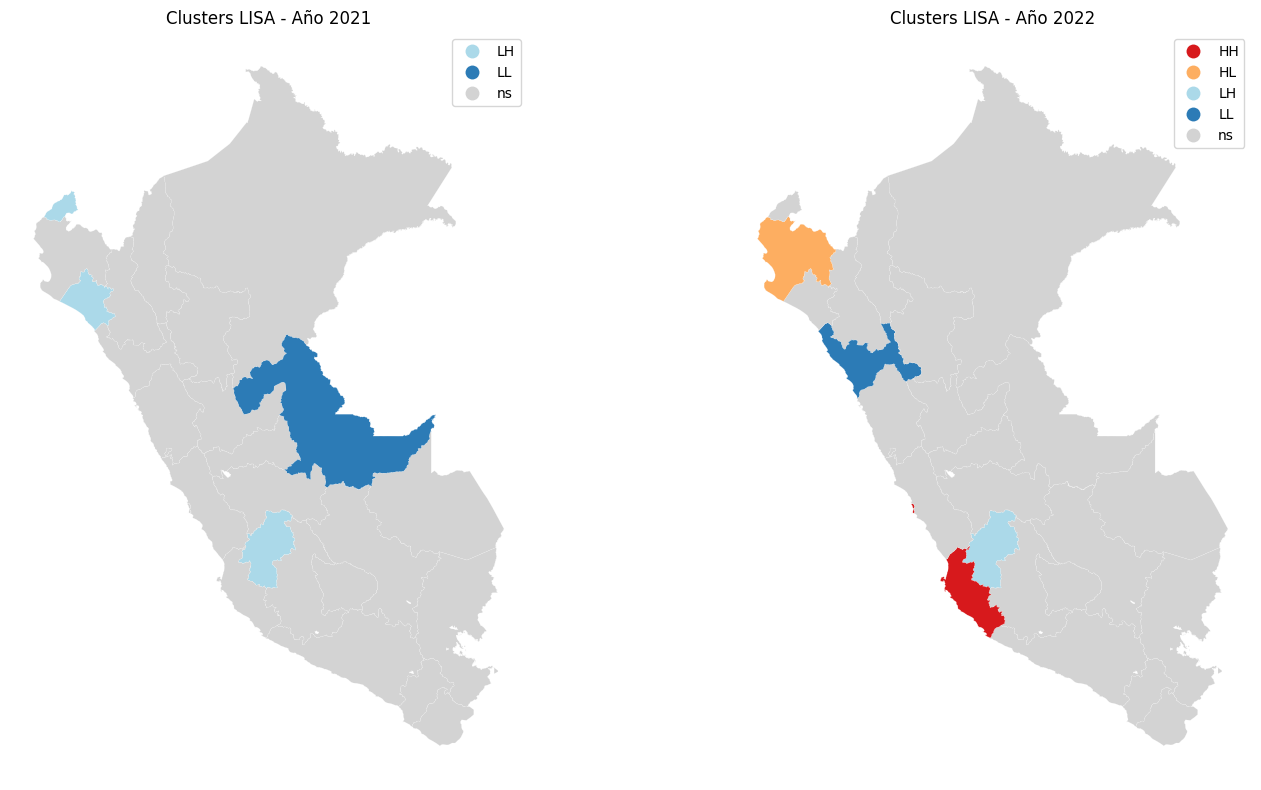

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Crear una figura con dos subgráficos

# Mapa para el primer año
ax1 = axes[0]
lisa_cluster(lisa_de60, mapa21, p=0.05, ax=ax1)  # lisa_ne5 y mapa21 para el primer año
ax1.set_title("Clusters LISA - Año 2021")

# Mapa para el segundo año
ax2 = axes[1]
lisa_cluster(lisa22_de60, mapa22, p=0.05, ax=ax2)  # lisa22_ne5 y mapa22 para el segundo año
ax2.set_title("Clusters LISA - Año 2022")

# Ajustar espacio entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()